In [140]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

keras.backend.set_image_data_format('channels_last')


# How to train a model:
# https://www.kaggle.com/manthankyada/mnist-digit-classification-cnn-beginner-s-guide


In [46]:
mnist_train = pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')

X_t_2_test = pd.read_csv('test.csv')

In [47]:
image_size=28*28

# Convert to trian and test data; Preserve original dataset
X_train = mnist_train.drop('label', axis=1).copy()
X_test = mnist_test.copy()
Y_train = mnist_train['label'].copy()

X_t_2 = X_t_2_test.copy()

# Normalize values
X_train = X_train / 255.0
X_test = X_test / 255.0

X_t_2 = X_t_2 / 255.0

In [48]:
# Reshape to 28 x 28 so that we can see the image ie. handwritten number
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

X_t_2 = X_t_2.values.reshape(-1, 28, 28, 1)

In [49]:
# Split between train and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [50]:
# Get one hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_val = keras.utils.to_categorical(Y_val, num_classes=10)

In [51]:
# Build CNN Model
def CNN():
    model = keras.Sequential()
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='valid', input_shape=(28, 28, 1), name='conv2d_1_1'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding='same', name='conv2d_1_2'))
    model.add(layers.BatchNormalization(name='bn_1'))
    model.add(layers.Activation('relu', name='relu_1'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_1'))
    model.add(layers.Dropout(0.2, name='drop_1'))
    # CONV > CONV > BN > RELU > MAXPOOLING > DROPOUT
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='valid', name='conv2d_2_1'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding='same', name='conv2d_2_2'))
    model.add(layers.BatchNormalization(name='bn_2'))
    model.add(layers.Activation('relu', name='relu_2'))
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding='valid', name='mp2d_2'))
    model.add(layers.Dropout(0.2, name='drop_2'))
    # FLATTEN > DENSE > CLASSIFICATION
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [52]:
model = CNN()

In [53]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=50, verbose=1)

Epoch 1/10
525/525 [==============================] - 49s 93ms/step - loss: 0.2017 - accuracy: 0.9381 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 2/10
525/525 [==============================] - 52s 99ms/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.0597 - val_accuracy: 0.9823
Epoch 3/10
525/525 [==============================] - 51s 97ms/step - loss: 0.0530 - accuracy: 0.9832 - val_loss: 0.0591 - val_accuracy: 0.9833
Epoch 4/10
525/525 [==============================] - 51s 96ms/step - loss: 0.0422 - accuracy: 0.9859 - val_loss: 0.0433 - val_accuracy: 0.9876
Epoch 5/10
525/525 [==============================] - 52s 99ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0503 - val_accuracy: 0.9858
Epoch 6/10
525/525 [==============================] - 54s 102ms/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.0374 - val_accuracy: 0.9900
Epoch 7/10
525/525 [==============================] - 53s 100ms/step - loss: 0.0301 - accuracy: 0.9899 - val_loss: 0.0627 - val_accurac

In [185]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(10, 10))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

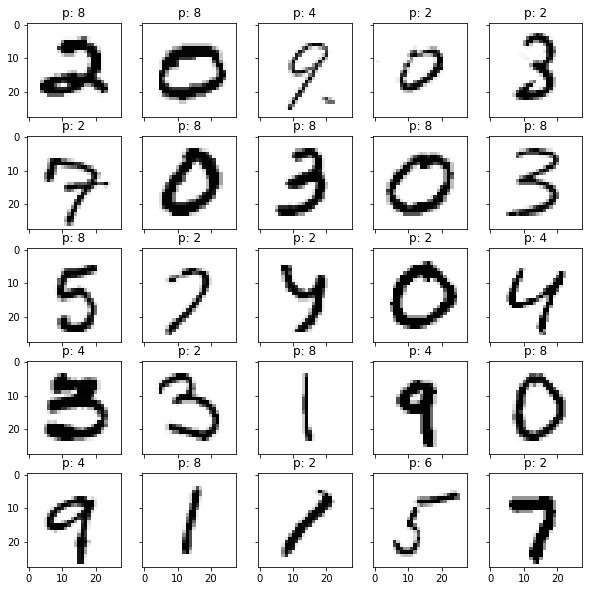

In [189]:
predict(model, X_t_2, 25)

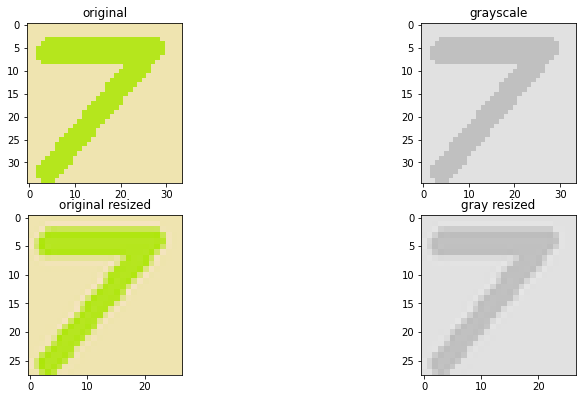

In [199]:
original = Image.open('7.png')
gray = original.convert('LA')
cp_original = original.copy()
cp_gray = gray.copy()
#--------------------------------- NORMAL SIZE
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(331)
ax2 = plt.subplot(333)
ax1.imshow(original)
ax1.set_title("original")
ax2.imshow(gray)
ax2.set_title("grayscale")
#--------------------------------- RESIZED
cp_original.thumbnail((28, 28), Image.ANTIALIAS)
cp_gray.thumbnail((28, 28), Image.ANTIALIAS)
ax3 = plt.subplot(334)
ax4 = plt.subplot(336)
ax3.imshow(cp_original)
ax3.set_title("original resized")
ax4.imshow(cp_gray)
ax4.set_title("gray resized")

plt.show()


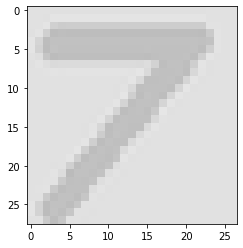

In [166]:
smol.thumbnail((28, 28), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(smol)

In [176]:
image_sequence = smol.getdata()
image_array = np.array(image_sequence)
div = image_array/255

In [194]:
div

array([[0.88235294, 1.        ],
       [0.88235294, 1.        ],
       [0.88235294, 1.        ],
       ...,
       [0.88235294, 1.        ],
       [0.88235294, 1.        ],
       [0.88235294, 1.        ]])

In [195]:
d4_img = 

array([0.88235294, 1.        , 0.88235294, ..., 1.        , 0.88235294,
       1.        ])

In [197]:
preds = model.predict(flat)

ValueError: in user code:

    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\dxoco\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 1]
